<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE40455-2020](https://jckantor.github.io/CBE40455-2020);
content is available [on Github](https://github.com/jckantor/CBE40455-2020.git).*


<!--NAVIGATION-->
< [3.6 Simulating Queuing Systems](https://jckantor.github.io/CBE40455-2020/03.06-Queuing-Systems-and-Poisson-Processes.html) | [Contents](toc.html) | [3.8 Modeling and Simulation of a Grocery Store Checkout Operation](https://jckantor.github.io/CBE40455-2020/03.08-Modeling-and-Simulation-of-a-Grocery-Store-Checkout-Operation.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE40455-2020/blob/master/docs/03.07-Simulating-Queuing-Systems.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE40455-2020/03.07-Simulating-Queuing-Systems.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.7 Simulating Queuing Systems

## 3.7.1 Kendall notation for queues

Kendall notation is a standardized methods to describe and classify queues. The notation consists of three factors written as A/S/c where where A describes the arrival process, S the service process, and c is the number of servers attending the queue.

* $A/S/c$
    * $A$: statistical nature of the arrival process 
    * $S$: Statistical nature of the service process 
    * $c$: Number of servers at the queue node
    
* Typical Statistics
    * D: Deterministic (average arrival rate $\lambda$)
    * M: Markov or memoryless (average arrival rate $r$)
    * G: General or arbitrary distribution (mean $\mu$ and standard deviation $\simga$ or variance $\sigma^2$)
    
Example: M/D/1

![Aircraft queue](https://i0.wp.com/nats.aero/blog/wp-content/uploads/2013/08/aircraft-queue-e1377251576844.jpg?ssl=1)

Example: M/M/8

![Call Center](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Emergency_Call_Center_112.jpg/640px-Emergency_Call_Center_112.jpg)

## 3.7.2 SimPy Stores: A generic tool for simulating queues.

SimPy [shared resources](https://simpy.readthedocs.io/en/latest/topical_guides/resources.html#) provide several means to implement queues in simulations. In particular, the shared resource type [Stores](https://simpy.readthedocs.io/en/latest/topical_guides/resources.html#res-type-store) is easy to use and well-suited to this purpose. The essential features are:

* `store = simpy.Store(env, capacity=4)` creates a new store object with a capacity of 4. Omitting capacity creates an a infinitely long queue.
* `yield store.put(x)` puts a Python object `x` on the queue. If the store is currently full, then generator instance waits until space is available.
* `x = yield store.get()` retrieves a Python object from the store. The default is to recover objects on a first-in-first-out discipline. Other disciplines can be implemented using the `FilterStore` or `PriortyStore` objects.
* `store.items` returns a list of all items currently available in the store. 

## 3.7.3 Example: An Order Processing Queue

A chemical storeroom processes orders for a large research campus. At peak loads it is expected to receive an average of one order every 12 minutes. The time required to process each order is a fixed 10 minutes. 

1. Describe the process using the Kendall notation.

2. Create a simulation of the order queue that operates for 8 hours. Determine the average time between the arrival and completion of an order, and determine the average queue length. 

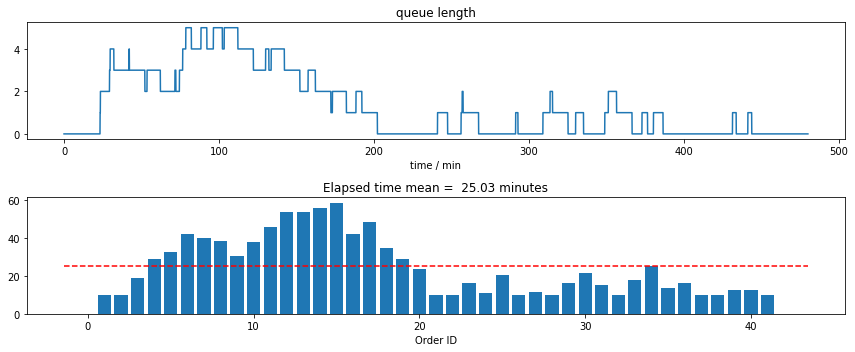

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import simpy
import pandas as pd

# time unit = minutes

order_log = []    # log data on order processing
queue_log = []    # log data on queue length

# Poisson process to place orders on the queue at a specified average rate
def order_generator(order_rate):
    order_id = 1
    while True:
        yield env.timeout(random.expovariate(order_rate))
        yield queue.put([order_id, env.now])
        order_id += 1
    
# Process orders from the queue
def server(t_process):
    while True:
        order_id, time_placed = yield queue.get()
        yield env.timeout(t_process)
        order_log.append([order_id, time_placed, env.now])
        
# log time and queue_length at regular time steps
def queue_logger(t_step=1.0):
    while True:
        queue_log.append([env.now, len(queue.items)])
        yield env.timeout(t_step)
        
env = simpy.Environment()
queue = simpy.Store(env)

env.process(queue_logger(0.1))
env.process(order_generator(1/12.0))
env.process(server(10.0))

env.run(until=8*60)

queue_df = pd.DataFrame(queue_log, columns=["time", "queue length"])
order_df = pd.DataFrame(order_log, columns=["order id", "start", "finish"])

fig, ax = plt.subplots(2, 1, figsize=(12, 5))

ax[0].plot(queue_df["time"], queue_df["queue length"])
ax[0].set_xlabel("time / min")
ax[0].set_title("queue length")

order_df["elapsed"] = order_df["finish"] - order_df["start"]
ax[1].bar(order_df["order id"], order_df["elapsed"])
ax[1].plot(ax[1].get_xlim(), order_df["elapsed"].mean()*np.ones([2,1]), "r--")
ax[1].set_xlabel("Order ID")
ax[1].set_title(f"Elapsed time mean = {order_df['elapsed'].mean():6.2f} minutes")
ax[1].set_ylim(0, ax[1].get_ylim()[1])

plt.tight_layout()

<!--NAVIGATION-->
< [3.6 Simulating Queuing Systems](https://jckantor.github.io/CBE40455-2020/03.06-Queuing-Systems-and-Poisson-Processes.html) | [Contents](toc.html) | [3.8 Modeling and Simulation of a Grocery Store Checkout Operation](https://jckantor.github.io/CBE40455-2020/03.08-Modeling-and-Simulation-of-a-Grocery-Store-Checkout-Operation.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE40455-2020/blob/master/docs/03.07-Simulating-Queuing-Systems.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE40455-2020/03.07-Simulating-Queuing-Systems.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>